# INVESTIGATION OF TMDb MOVIES DATASET

## TABLE OF CONTENTS
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The TMDb dataset contains information on about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Some other columns include cast, director, popularity, runtime, etc.

## Questions
Some of the intriguing questions we would like to find out from this dataset include:
<li> What movie costs more to build, action or adventure?
<li> Do movies with homepages gain more popularity than movies without?
<li> What year and what decade had the best movie (vote_average) on average?
<li> Which director gets the best ratings?
<li> Does runtime affect ratings?
<li> Is there a correlation between rating and revenue generated?
<li> Is there a correlation between popularity and revenue generated?
<li> Does the number of production companies tend to increase popularity and budget?

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

In [4]:
#first we drop the unnecessary columns. Tagline, cast, keywords, overview are all irrelevant to answering the questions
df.drop(['tagline', 'cast', 'keywords', 'overview'], axis=1, inplace=True)

In [5]:
#convert release date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

In [6]:
#Null value rows of imdb_id column have incomplete data in other columns, so we drop them
df.dropna(subset=['imdb_id'], inplace=True)

In [7]:
#Search for duplicates and delete any
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

1


In [8]:
#we can drop columns id and original title also, as they are irrelevant to answering the questions
df.drop(['id', 'original_title'], inplace=True, axis=1)
# we then convert production companies column to a list type instead of string format, for easy analysis.
# we do this by splitting on '|'

df['production_companies'] = df['production_companies'].str.split('|')
df.head()

,imdb_id,popularity,budget,revenue,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,"[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,"[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,"[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_id               10855 non-null  object        
 1   popularity            10855 non-null  float64       
 2   budget                10855 non-null  int64         
 3   revenue               10855 non-null  int64         
 4   homepage              2934 non-null   object        
 5   director              10815 non-null  object        
 6   runtime               10855 non-null  int64         
 7   genres                10834 non-null  object        
 8   production_companies  9830 non-null   object        
 9   release_date          10855 non-null  datetime64[ns]
 10  vote_count            10855 non-null  int64         
 11  vote_average          10855 non-null  float64       
 12  release_year          10855 non-null  int64         
 13  budget_adj      

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: What movie costs more to build, action or adventure?

In [10]:
# To answer this, first we need to split the movies into action and adventure movies. The movies containing both genres
# will be categorized as "Action and Adventure". Those that do not belong to either genre will be NaN types and will be dropped later.
# A function is the best way to go about this. A new column will be created.
df1 = df.copy()
# a copy of the dataset is made so as not to cause permanent loss of important info in main dataframe.
def genre_sort(genre):
    if 'Adventure' in str(genre) and 'Action' in str(genre):
        return 'Action and Adventure'
    elif 'Adventure' in str(genre):
        return 'Adventure'
    elif 'Action' in str(genre):
        return 'Action'
    else:
        return np.nan
    
df1['new_genre'] = df['genres'].apply(genre_sort)
# to view our new column,
df1[['genres', 'new_genre']].head()

,genres,new_genre
0,Action|Adventure|Science Fiction|Thriller,Action and Adventure
1,Action|Adventure|Science Fiction|Thriller,Action and Adventure
2,Adventure|Science Fiction|Thriller,Adventure
3,Action|Adventure|Science Fiction|Fantasy,Action and Adventure
4,Action|Crime|Thriller,Action


In [11]:
# To write a function that will help in plotting
# The bar_plotter function takes seven parameters: x-axis coordinates, bar heights, tick labels, colors, chart title, 
# x-axis title and y-axis title.
def bar_plotter(x, xheight, ticks, colors, title1, xlabel1, ylabel1):
    plt.figure(figsize=(10,5))
    plt.bar(x, xheight, tick_label=ticks, color=colors)
    # to add values on each bar, 
    for i in range(len(x)):
        plt.text(i, xheight[i], round(xheight[i], 2), ha='center')
    plt.title(title1)
    plt.xlabel(xlabel1)
    plt.ylabel(ylabel1)
    plt.show()

new_genre
Action                  2.018227e+07
Action and Adventure    4.138920e+07
Adventure               3.234056e+07
Name: budget, dtype: float64


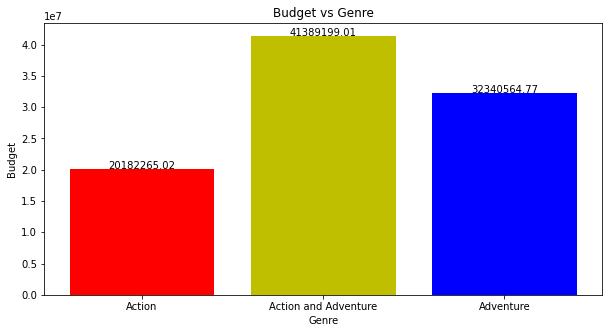

In [12]:
#we then drop NaN, calculate mean budget and visualize results
df1.dropna(subset=['new_genre'], inplace=True)
budgets = df1.groupby('new_genre').budget.mean()
print(budgets)
bar_plotter([0, 1, 2], budgets.values, budgets.index, ['r', 'y', 'b'], 'Budget vs Genre', 'Genre', 'Budget')

In [13]:
df1.groupby('new_genre').budget_adj.max()

new_genre
Action                  2.374361e+08
Action and Adventure    4.250000e+08
Adventure               2.541001e+08
Name: budget_adj, dtype: float64

We can say from our results that Adventure movies cost more than Action movies on average by about \\$12.16M, and movies that are both action and adventure cost the most on average. Also, the most expensive of the three is the "Action and Adventure" category while the most expensive Adventure movie surpasses that of Action by $1.7M.

### Question 2: Do movies with homepages gain more popularity than movies without?

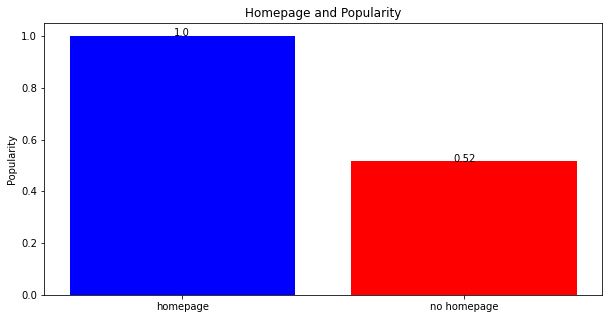

In [14]:
# To analyse this, first we have to separate the movies with homepages and those without, using boolean masks
df2 = df.copy()
# again, we make copies so as not to cause permanent loss of data in main dataset. This will be done in other questions
home = df2.homepage.isnull()==False
no_home = df2.homepage.isnull()
bar_plotter([0,1], [df2[home].popularity.mean(), df2[no_home].popularity.mean()], ['homepage', 'no homepage'], 
            ['b', 'r'], 'Homepage and Popularity', '', 'Popularity')

As expected, movies that have homepages would be more popular because they gain more awareness from their sites.

### Question 3: What year and what decade had the best movie (vote_average) on average?

In [15]:
# make a copy of main dataset and sort by vote average in descending order
df3 = df.copy()
df3.sort_values('vote_average', ascending=False).head()

,imdb_id,popularity,budget,revenue,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,tt2044056,0.006925,0,0,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,900,Documentary,NaN,2011-09-03,14,9.2,2011,0.0,0.0
538,tt3983674,0.114264,0,0,http://themaskyoulivein.org,Jennifer Siebel Newsom,88,Documentary,NaN,2015-01-01,11,8.9,2015,0.0,0.0
1200,tt3973198,0.129531,0,0,NaN,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,2014-12-16,41,8.8,2014,0.0,0.0
2269,tt1828232,0.222293,0,0,http://www.lifecyclesfilm.com/,Derek Frankowski,47,Documentary,NaN,2010-10-02,27,8.8,2010,0.0,0.0
6911,tt0110758,0.212010,0,0,NaN,David Mallet,145,Music,"[SMV Enterprises, Columbia Music Video, EMI]",2006-07-09,23,8.7,2006,0.0,0.0


The results shown in this grouping seem to have low number of votes, so that does not really make it a fair comparison with more popular movies (i.e movies with more votes).

A more effective method would be to pull out the highest vote average from movies with vote counts greater than the median.

In [16]:
median_vote_count = df3.vote_count.median()
df3_filtered = df3.query('vote_count >= {}'.format(median_vote_count))
# Now, to cummulate by year and get the years with best vote averages, 
df3_best_years = df3_filtered.groupby('release_year').mean().sort_values('vote_average', ascending=False).head()
df3_best_years

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,
1960,1.092246,2.319618e+06,1.523812e+07,127.000000,261.625000,7.250000,1.710247e+07,1.123502e+08
1962,0.914357,4.053333e+06,1.674776e+07,141.666667,221.444444,7.066667,2.921825e+07,1.207254e+08
1964,1.232442,3.437240e+06,3.655353e+07,113.777778,287.000000,7.066667,2.416472e+07,2.569811e+08
1967,1.050560,5.380538e+06,5.160266e+07,110.846154,202.230769,6.953846,3.517131e+07,3.373144e+08
1965,0.884176,5.000000e+06,5.944741e+07,118.857143,190.428571,6.914286,3.460282e+07,4.114096e+08


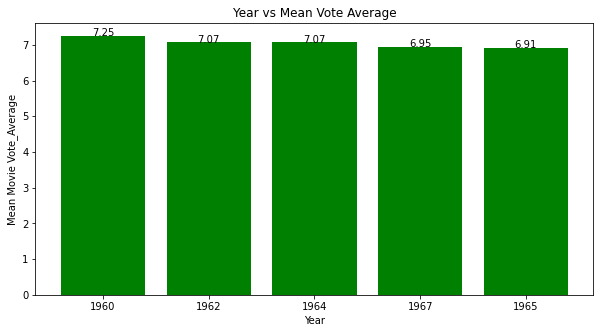

In [17]:
# to visualize the results,
bar_plotter(np.arange(5), list(df3_best_years.vote_average), df3_best_years.index, 'g', 'Year vs Mean Vote Average',
           'Year', 'Mean Movie Vote_Average')

Voila, 1960 had the best movies! :-D

Now we know what year to look for interesting movies to watch in our free time. ;-)

1962 and 1964 are great picks too!

In [27]:
#To answer for best decades, we have to create a new column and sort by decade up until 2010
bin_edges = np.arange(1960, 2011, 10)
bin_name = [str(str(1960 + 10*x) + '-' + str(1959+ 10*(x+1))) for x in range(len(bin_edges))]
bin_name = bin_name[:-1]
# bin_name is a list of all the decades from 1960 till 2010
df3_filtered['decade'] = pd.cut(df3_filtered['release_year'], bin_edges, labels=bin_name)
#we then drop NaN decade columns i.e 2011-2015 because it is not up to a decade
df3_filtered.dropna(subset=['decade'], inplace=True)
print(df3_filtered[['release_date', 'release_year', 'decade']].head())
# we ignore the jupyter notebook warnings
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

     release_date  release_year     decade
1329   1977-03-20          1977  1970-1979
1330   1977-07-07          1977  1970-1979
1331   1977-06-22          1977  1970-1979
1332   1977-04-19          1977  1970-1979
1333   1977-11-03          1977  1970-1979


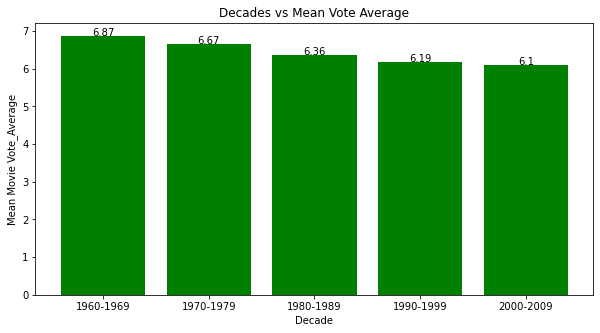

In [19]:
#now we plot to visualize best decades by vote_average mean
# first we group by mean vote average
best_decades = df3_filtered.groupby('decade').vote_average.mean()
# then plot
bar_plotter(np.arange(len(best_decades)), best_decades.values, best_decades.index, 'g', 'Decades vs Mean Vote Average',
           'Decade', 'Mean Movie Vote_Average')

1960-1969 seems to be the decade with the best average ratings and then ratings have then decreased with time(by decades) since then.

### Question 4: Which director gets the best ratings?

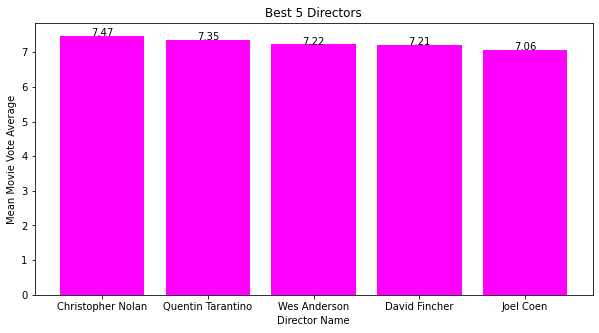

In [20]:
# To answer this, we first have to filter the directors that have at least 10 movies in the list. 
df4 = df.copy()
directors = df4.director.value_counts()
directors = directors[directors>=10]
# dictionary to store directors and their mean vote_averages
director_count = {}
for director in directors.index:
    director_count[director] = df4[df4['director'] == director].vote_average.mean()
# to convert the dict to series for easy computation
dir_series = pd.Series(director_count)
best_dir = dir_series.sort_values(ascending=False)[:5]
# then we visualize
bar_plotter(np.arange(5), best_dir.values, best_dir.index, 'magenta', 'Best 5 Directors',
            'Director Name', 'Mean Movie Vote Average')

Christopher Nolan is the movie director with the best voter ratings! Quentin Tarantino (my personal favorite) is runner up :-D

### Question 5: Does runtime affect ratings?

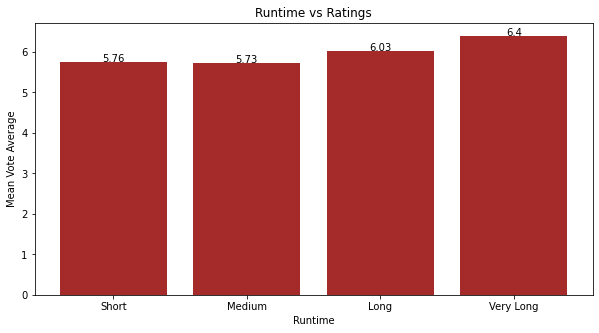

In [21]:
#to have a comprehensive plot, we have to sort in groups: Very Long, Long, Medium and short movies
df5 = df.copy()
# using the describe() function, we extracted the min,25%, 50%, 75% and max values of runtime. 
# These values serve as edges for the categorisation.
edges = [0, 90, 99, 111, 900]
bins = ['Short', 'Medium', 'Long', 'Very Long']
df5['runtime_length'] = pd.cut(df5['runtime'], edges, labels=bins)
# the cut is made and the column successfully created
# now we group by the runtime length and visualize the mean vote averages for each
run = df5.groupby('runtime_length').vote_average.mean()
bar_plotter(np.arange(4), run.values, run.index, 'brown', 'Runtime vs Ratings', 'Runtime', 'Mean Vote Average')

Very long movies get the best ratings, followed by Long, Short and Medium in that order.

### Question 6: Is there a correlation between rating(vote_average) and revenue generated?

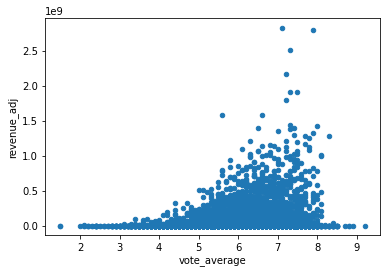

In [22]:
# we plot vote_average and revenue_adj on a scatter plot to observe trends and correlation
df.plot(x='vote_average', y='revenue_adj', kind='scatter');

There is no linear relationship observed, but it can be seen that low rated movies do not generate much revenue compared to movies with higher ratings.

### Question 7: Is there a correlation between popularity and revenue generated?

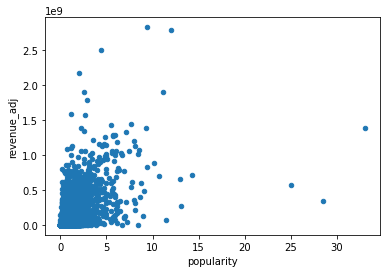

In [23]:
# we can plot popularity vs revenue_adj on a scatter plot to observe trends
df.plot(x='popularity', y='revenue_adj', kind='scatter');

No conclusions can be drawn from this visualization

### Question 8: Does the number of production companies tend to increase popularity and budget?

In [24]:
df6 = df.copy()
# first we drop rows without production companies, then create a new column that is the number of production companies
df6.dropna(subset=['production_companies'], inplace=True)
df6['prod_count'] = df6['production_companies'].apply(lambda x: len(x))
# we then group by this count
prod = df6.groupby('prod_count').mean()
prod

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
prod_count,,,,,,,,,
1,0.460775,7.934482e+06,2.119670e+07,98.207860,115.133624,5.932082,1998.413974,1.070750e+07,3.245759e+07
2,0.663624,1.421515e+07,4.301702e+07,102.989531,212.001163,5.969872,1998.782474,1.833696e+07,6.249810e+07
3,0.783736,1.828453e+07,5.450945e+07,104.615428,278.872377,5.961202,2002.401021,2.189869e+07,6.827763e+07
4,0.941038,2.672765e+07,6.944778e+07,107.262136,384.525351,5.998813,2005.226537,2.973946e+07,7.798716e+07
5,1.111944,3.304067e+07,7.816039e+07,108.990231,488.486679,6.054263,2007.424512,3.509187e+07,8.187568e+07


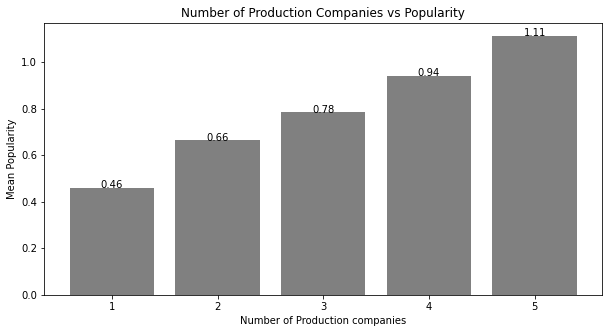

In [25]:
# we then plot bar chart to visualize number of production companies vs popularity
bar_plotter(np.arange(5), list(prod.popularity), prod.index, 'gray', 'Number of Production Companies vs Popularity', 
            'Number of Production companies', 'Mean Popularity')

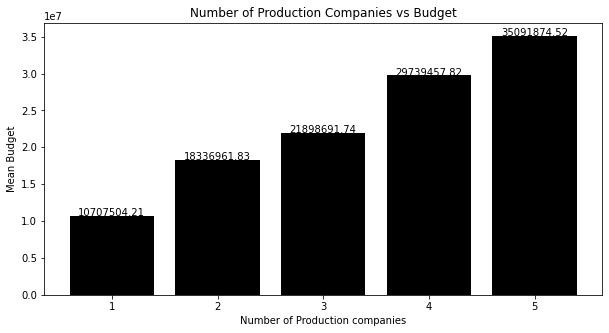

In [26]:
# we then do the same for production companies vs budget_adj
bar_plotter(np.arange(5), list(prod.budget_adj), prod.index, 'black', 'Number of Production Companies vs Budget', 
            'Number of Production companies', 'Mean Budget')

A trend can be observed in both plots. A higher number of production companies correlates with higher popularity and budget.

<a id='conclusions'></a>
## Conclusions

In this project, we have discovered the following: 

<li> Adventure movies cost more than Action movies on average.
<li> Having a website or a homepage significantly helps to gain more popularity for a movie.
<li> The year 1960 had the best movies and 1960-1969 was the best decade for movies according to average voter ratings.
<li> Christopher Nolan is the voters' best director.
<li> Movies with longer runtime tend to get better voter ratings
<li> Better voter averages strongly result to more revenue.
<li> The more the production companies, the greater the budget and movie popularity tends to be .

Some of the limitations of the project include:
<li> Zero values in columns like 'revenue_adj' and 'runtime' were present in many rows. This may be an error and may affect results.
<li> Movies having multiple genres will lead to complicated calculation of data for each movie genre.